In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = "drive/MyDrive/MLLAB/covid_nb.csv"
df = pd.read_csv(file_path)

In [ ]:
df

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [ ]:
# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()
df['pc'] = le.fit_transform(df['pc'])
df['wbc'] = le.fit_transform(df['wbc'])
df['mc'] = le.fit_transform(df['mc'])
df['ast'] = le.fit_transform(df['ast'])
df['bc'] = le.fit_transform(df['bc'])
df['ldh'] = le.fit_transform(df['ldh'])

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Naïve Bayesian classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)



In [ ]:
# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
accuracy
f1

0.8571428571428571

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


In [ ]:
# Print performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {roc_auc:.2f}')

Accuracy: 0.80
Precision: 1.00
Recall: 0.75
F1 Score: 0.86
AUC: 0.88


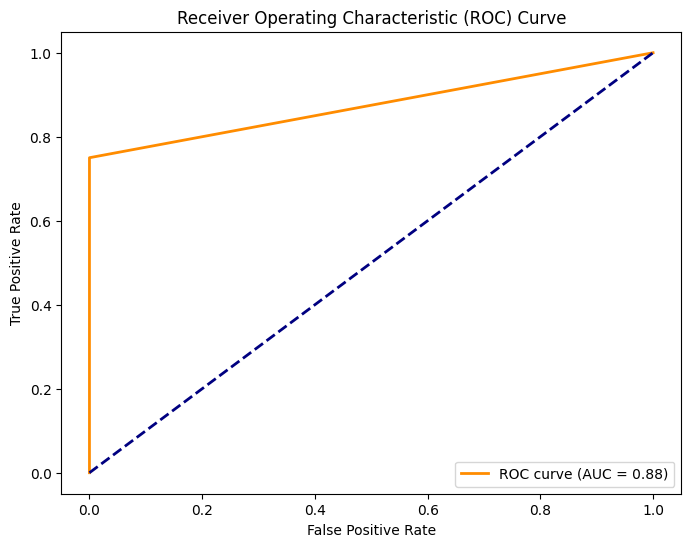

In [ ]:
# Draw the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.10/dist-pack

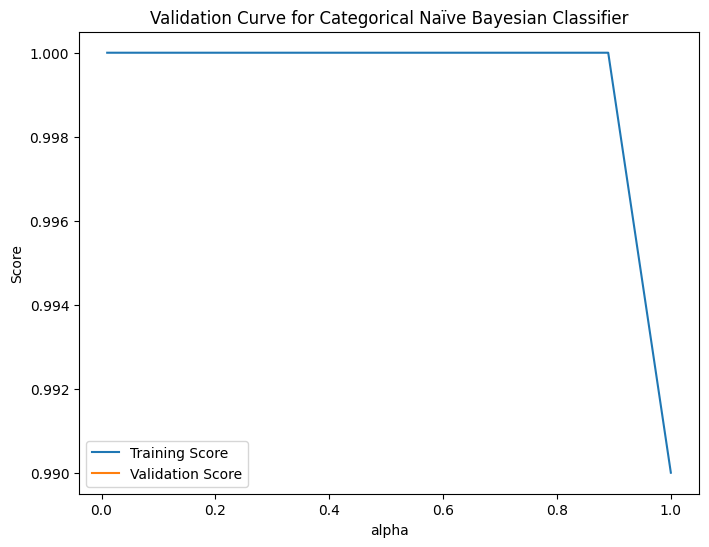

In [ ]:
## Draw the validation curves
param_range = np.linspace(0.01, 1.0, 10)
train_scores, test_scores = validation_curve(
    CategoricalNB(), X, y, param_name='alpha', param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('Validation Curve for Categorical Naïve Bayesian Classifier')
plt.legend()
plt.show()